In [122]:
import numpy as np
import matplotlib.pyplot as plt

# format plot styles and numbers
plt.style.use('ggplot')
np.set_printoptions(precision=2, threshold=10)

In [124]:
data = np.genfromtxt('/content/house_price.txt', delimiter=',')

In [125]:
data

array([[ 2104.,  3999.],
       [ 1600.,  3299.],
       [ 2400.,  3690.],
       ...,
       [  852.,  1799.],
       [ 1852.,  2999.],
       [ 1203.,  2395.]])

In [133]:
X = data[:, 0]
y = data[:, 1]

In [132]:
X.shape

(41,)

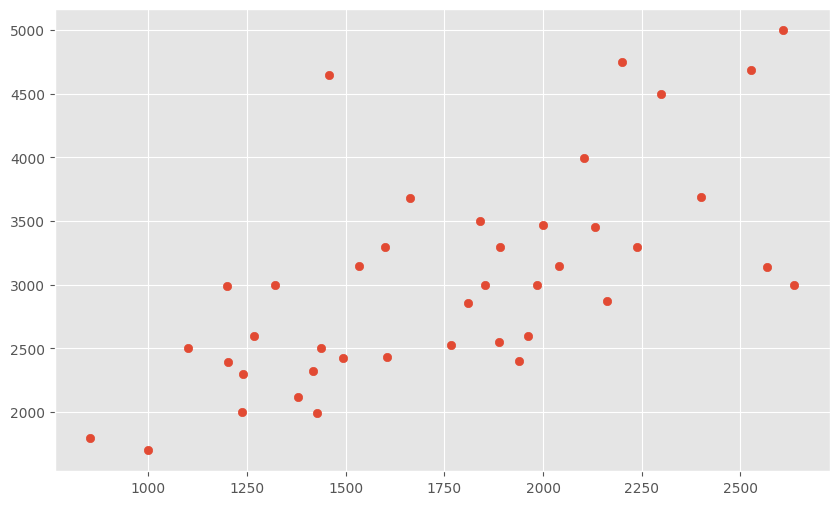

In [135]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.show()

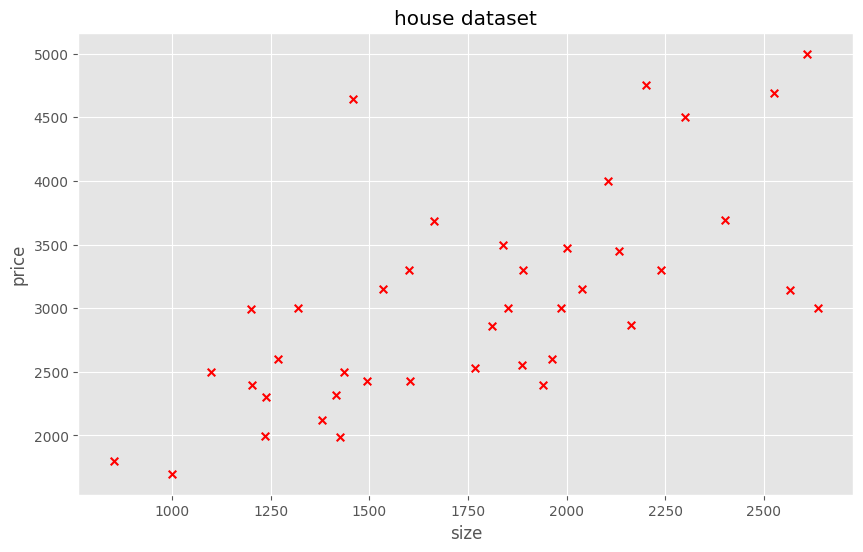

In [136]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=30, c='r', marker='x')
plt.xlabel('size')
plt.ylabel('price')
plt.title('house dataset')
plt.show()

In [137]:
theta = np.array([[500.], [0.0]])

In [139]:
theta.shape

(2, 1)

In [140]:
theta

array([[ 500.],
       [   0.]])

In [141]:
x = np.arange(500, 3000, 100)

In [143]:
x.shape

(25,)

In [144]:
x = x[:, None]  # from 1d to 2d

In [145]:
x.shape

(25, 1)

In [146]:
x

array([[ 500],
       [ 600],
       [ 700],
       ...,
       [2700],
       [2800],
       [2900]])

In [147]:
x = np.concatenate((np.ones_like(x), x), axis=1)  # horizontal concatination
print(x)

[[   1  500]
 [   1  600]
 [   1  700]
 ...
 [   1 2700]
 [   1 2800]
 [   1 2900]]


In [148]:
h = x @ theta

In [149]:
h

array([[ 500.],
       [ 500.],
       [ 500.],
       ...,
       [ 500.],
       [ 500.],
       [ 500.]])

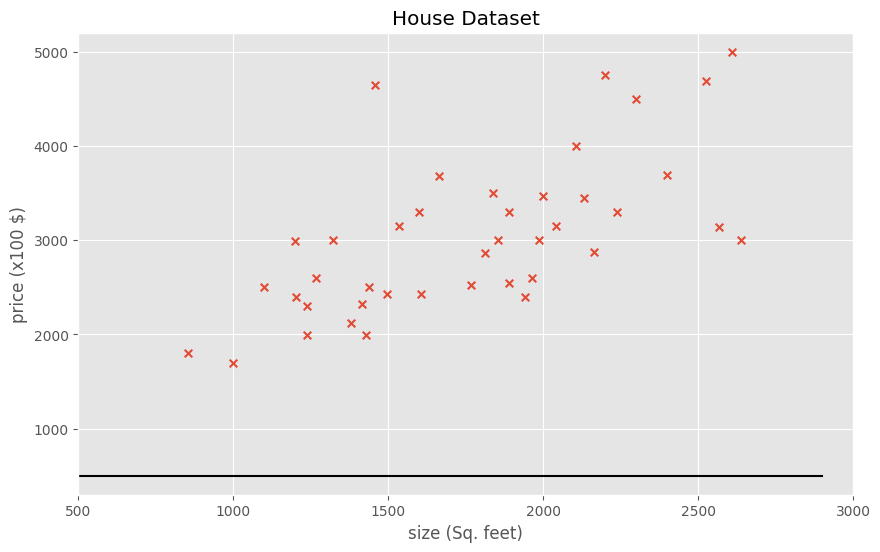

In [152]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=30, marker='x')
plt.plot(x, h, 'k')
plt.xlabel('size (Sq. feet)')
plt.ylabel('price (x100 $)')
plt.title('House Dataset')
plt.xlim(500, 3000)
plt.ylim(300, 5200)
plt.show()


In [153]:
from matplotlib import animation, rc
rc('animation', html='html5')

In [154]:
def h(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

def mse(y_pred, y_true):
    return 0.5 * ((y_pred - y_true) ** 2).mean()


In [155]:
x, y = data[:, 0], data[:, 1]

In [156]:
mu = x.mean()
sigma = x.std()
xn = (x - mu) / sigma  # normalization
print(xn)

[ 0.74 -0.35  1.38 ... -1.97  0.19 -1.21]


In [157]:
xn.shape

(41,)

In [160]:
# learning rate
alpha = 5e-3

# initialize parameters randomly
theta_0 = np.random.randn()
theta_1 = np.random.randn()

print("Initial guess:")
print(" theta_0 = %.4f\n theta_1 = %.4f" %(theta_0, theta_1))

costs = []

def update_step():
    global theta_0, theta_1, costs

    # predict
    y_pred = h(theta_0, theta_1, xn)
    costs.append(mse(y_pred, y))

    # compute gradients
    dtheta_0 = (y_pred - y)
    dtheta_1 = xn * dtheta_0

    # update parameters
    theta_0 -= alpha * dtheta_0.mean()
    theta_1 -= alpha * dtheta_1.mean()

Initial guess:
 theta_0 = 0.9615
 theta_1 = 1.2372


In [161]:
fig = plt.figure(dpi=100, figsize=(5, 3))

# plot data
plt.scatter(xn, y, s=30, marker='x')

# plot prediction (a line)
y_pred = h(theta_0, theta_1, xn)
line, = plt.plot(xn, y_pred, 'k')
plt.close()

def animate(i):
    line.set_ydata(h(theta_0, theta_1, xn))
    for i in range(100): update_step()
    return line,

anim = animation.FuncAnimation(fig, animate, np.arange(0, 20), interval=200, repeat_delay=1000)


In [162]:
anim

In [163]:
print(" theta_0 = %7.2f\n theta_1 = %7.2f" %(theta_0, theta_1))

 theta_0 = 3038.31
 theta_1 =  537.90


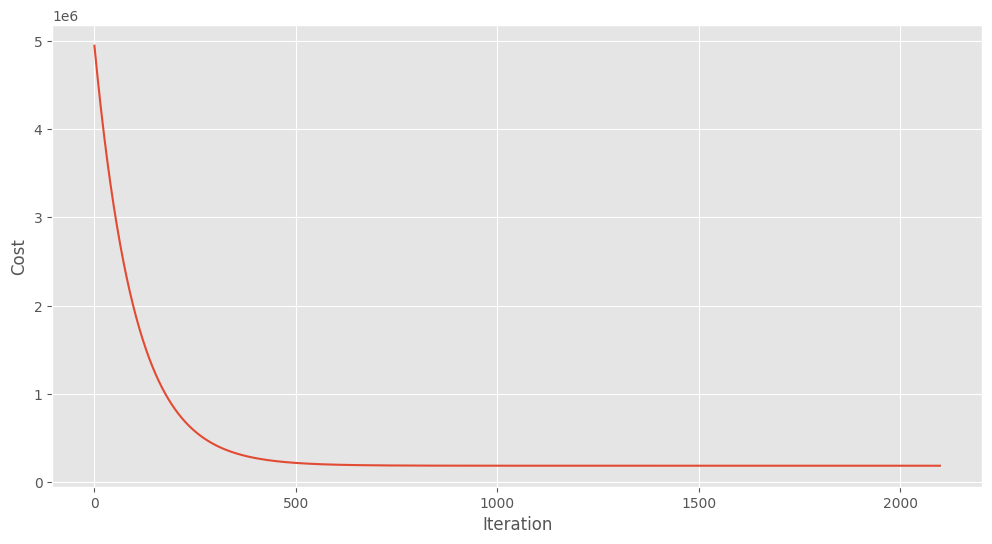

In [164]:
plt.figure(figsize=(12, 6))
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

In [165]:
x_test = 1750

In [166]:
x_test_n = (x_test - mu) / sigma

In [167]:
y_test = h(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 3023.25 $
